# A model that predicts a house's price based on its characteristics

In [2]:
#*********importing all necessary modules, packages and libraries**************

import pandas as pd                                    #For data manipulating and preprocessing
import matplotlib.pyplot as plt                        #For data visualization and regression plotting
import seaborn as sns                                  #For data visualization
import numpy as np                                     #For some maths operations
from sklearn.preprocessing import StandardScaler       #For standardization

from sklearn.model_selection import train_test_split   #For dividing data
from sklearn.linear_model import LinearRegression      #For creating a linear model
from sklearn.preprocessing import PolynomialFeatures   #For transforming our inputs to fit the polonomyal regression
from sklearn.metrics import mean_squared_error         #For calculating the Mean Squared Error
from sklearn.metrics import r2_score                   #For calculating the accuracy of our model
import matplotlib as mpl

# *Data importation and preprocessing*

In [3]:
#**********import a data maintaining houses and their characteristics***********

df=pd.read_csv("kc_house_data.csv")
df.head()      #Showing first lines of data to make sure it's well structured and organized

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#***********Data exploration**************

df.info()  #Get a general overview of our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.tail(1)       #Showing last row, so we know our data contains 21613 rows (houses)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
price_df=df["price"].describe().to_frame().transpose()
price_df         #Showing general information about the target "price"

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0,321950.0,450000.0,645000.0,7700000.0


In [7]:
df.isnull().sum()        #making sure there's no null value in our data

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
#Keep the useful part of date only
date_p2=[]
i=0
for date in df["date"]:
  date=date.split("T")
  date_p2.append(date[1])
  df["date"].loc[i]=int(date[0])
  i+=1
date_p2_diff=[elt for elt in date_p2 if elt!="000000"]
print(date_p2_diff)     #Making sure 2nd part of date is not useful

df.info()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


[]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  lon

In [9]:
d={}
for date in df["date"]:
  d[date]=int(date)
df["date"].replace(d, inplace=True)

date_df=df["date"].describe().to_frame().transpose()
date_df   #Learn general information about dates data was taken

,count,mean,std,min,25%,50%,75%,max
date,21613.0,2.014390e+07,4436.582469,20140502.0,20140722.0,20141016.0,20150217.0,20150527.0


# *Data Visualization*

In [10]:
df["bedrooms"].describe()             #Learn information about bedrooms

count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


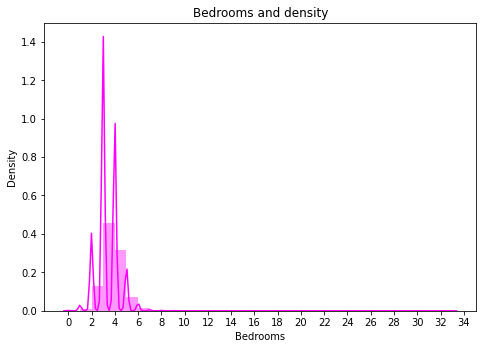

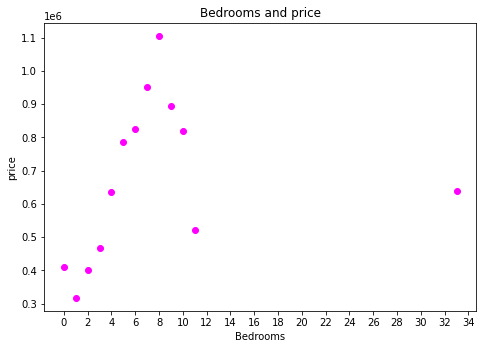

In [11]:
fig1=plt.figure()
x=np.arange(0,35,2)
ax=fig1.add_axes([0,0,1,1])
plt.title("Bedrooms and density")
ax.set_xlabel("Bedrooms")
ax.set_ylabel("Density")
ax.set_xticks(x)
sns.distplot(x=df["bedrooms"], kde=True, bins=33, color="magenta")

fig2=plt.figure()
f2=df[["bedrooms", "price"]].groupby(["bedrooms"]).mean().reset_index()
ax2=fig2.add_axes([0,0,1,1])
plt.title("Bedrooms and price")
ax2.set_xlabel("Bedrooms")
ax2.set_ylabel("price")
ax2.set_xticks(x)
ax2.scatter(f2["bedrooms"], f2["price"], c="magenta")

In [12]:
df["bathrooms"].describe()             #Learn information about bedrooms

count    21613.000000
mean         2.114757
std          0.770163
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

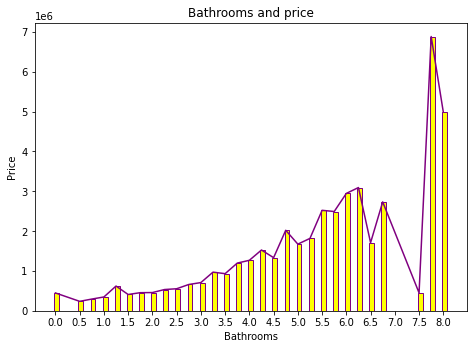

In [13]:
fig3=plt.figure()
f3=df[["bathrooms", "price"]].groupby(["bathrooms"]).mean().reset_index()
x=np.arange(0,8.5,0.5)
ax3=fig3.add_axes([0,0,1,1])
plt.title("Bathrooms and price")
ax3.set_xlabel("Bathrooms")
ax3.set_ylabel("Price")
ax3.set_xticks(x)
ax3.bar(f3["bathrooms"]+0.025, f3["price"], color="yellow", width=0.1, linewidth=1, edgecolor="purple")
ax3.plot(f3["bathrooms"], f3["price"], color="purple")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

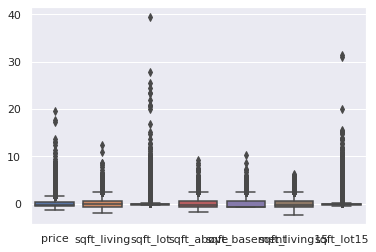

In [14]:
fig4=plt.figure()
sns.set(rc={'figure.figsize':(20,30)})
f4=df[["price", "sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "sqft_living15", "sqft_lot15"]]
scaler=StandardScaler()
for column in f4:
  f4[column]=scaler.fit_transform(f4[[column]].values)
  
sns.boxplot(data=f4)


<Figure size 1440x2160 with 0 Axes>

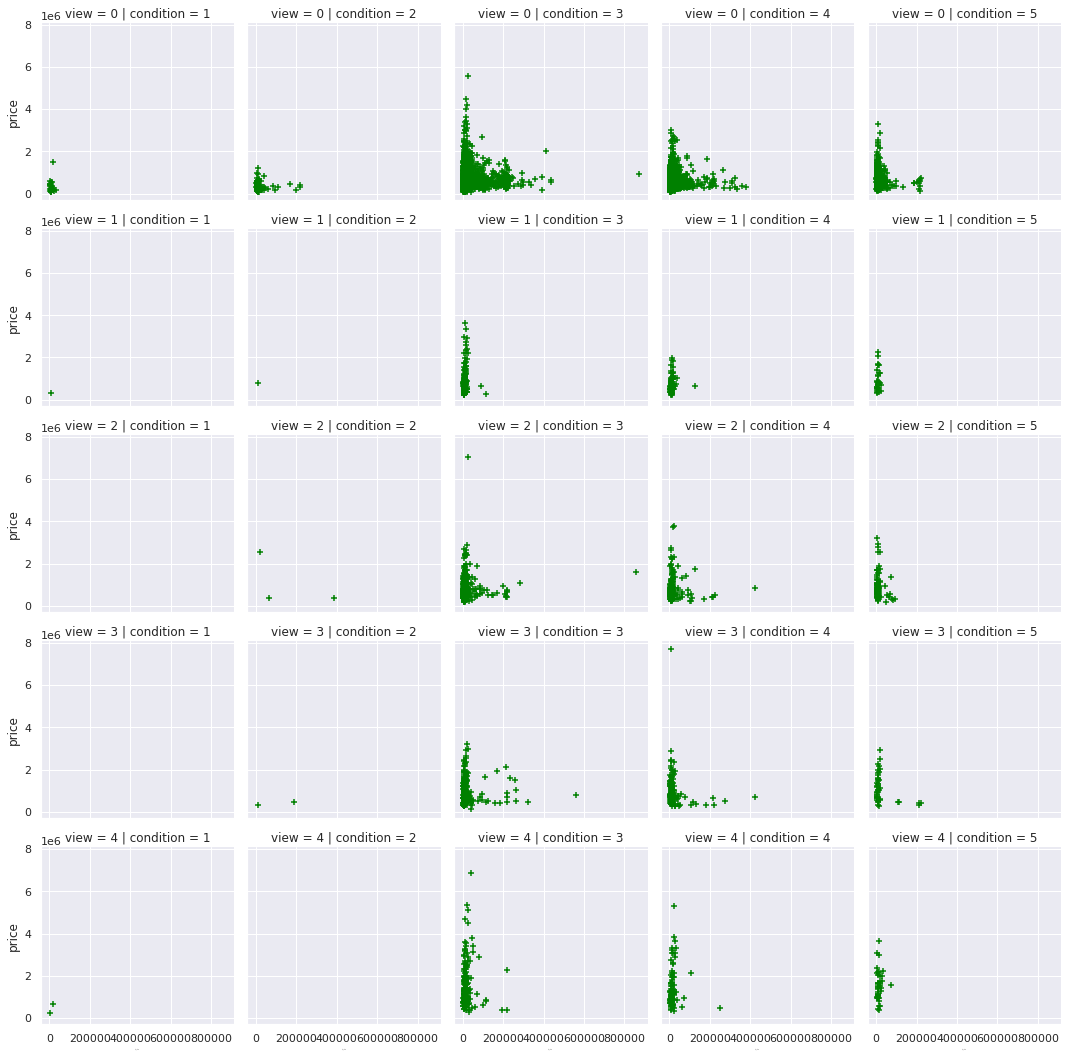

In [15]:
fig4=plt.figure()
sns.set(rc={'figure.figsize':(20,30)})
f4=df[["price", "sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "sqft_living15", "sqft_lot15", "condition", "view"]]

grid=sns.FacetGrid(f4, row="view", col="condition")
grid.map(plt.scatter, "sqft_lot15", "price", marker="+", color="green")         #use sqft_lot15 because it contains less outliers
grid.set_xlabels(fontsize=0.2)


<Figure size 1440x2160 with 0 Axes>

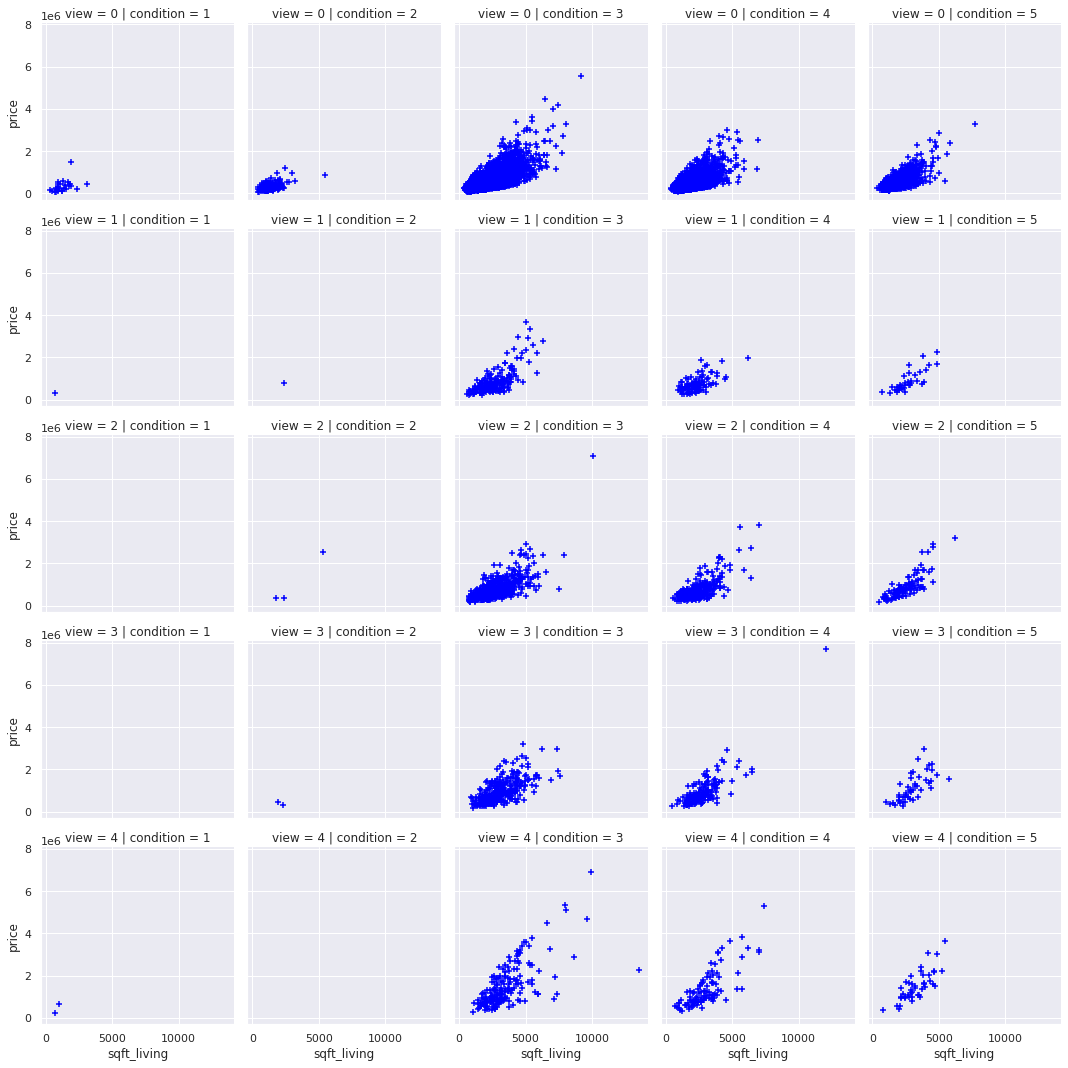

In [16]:
fig5=plt.figure()
sns.set(rc={'figure.figsize':(20,30)})
f5=df[["price", "sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "sqft_living15", "sqft_lot15", "condition", "view"]]

grid2=sns.FacetGrid(f5, row="view", col="condition")
grid2.map(plt.scatter, "sqft_living", "price", marker="+", color="blue")

<Figure size 1440x2160 with 0 Axes>

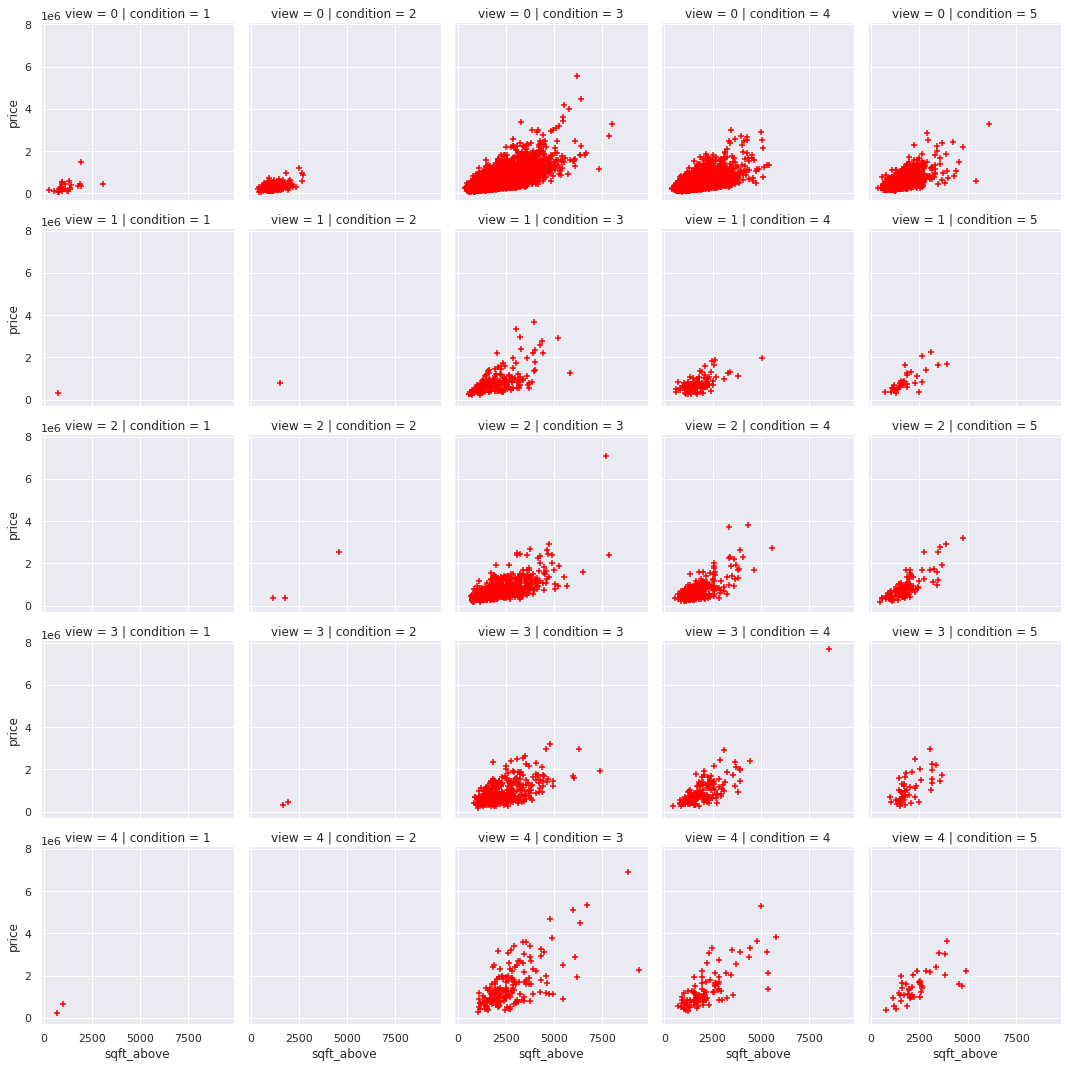

In [17]:
fig6=plt.figure()
sns.set(rc={'figure.figsize':(20,30)})
f6=df[["price", "sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "sqft_living15", "sqft_lot15", "condition", "view"]]

grid3=sns.FacetGrid(f6, row="view", col="condition")
grid3.map(plt.scatter, "sqft_above", "price", marker="+", color="red")

<Figure size 1440x2160 with 0 Axes>

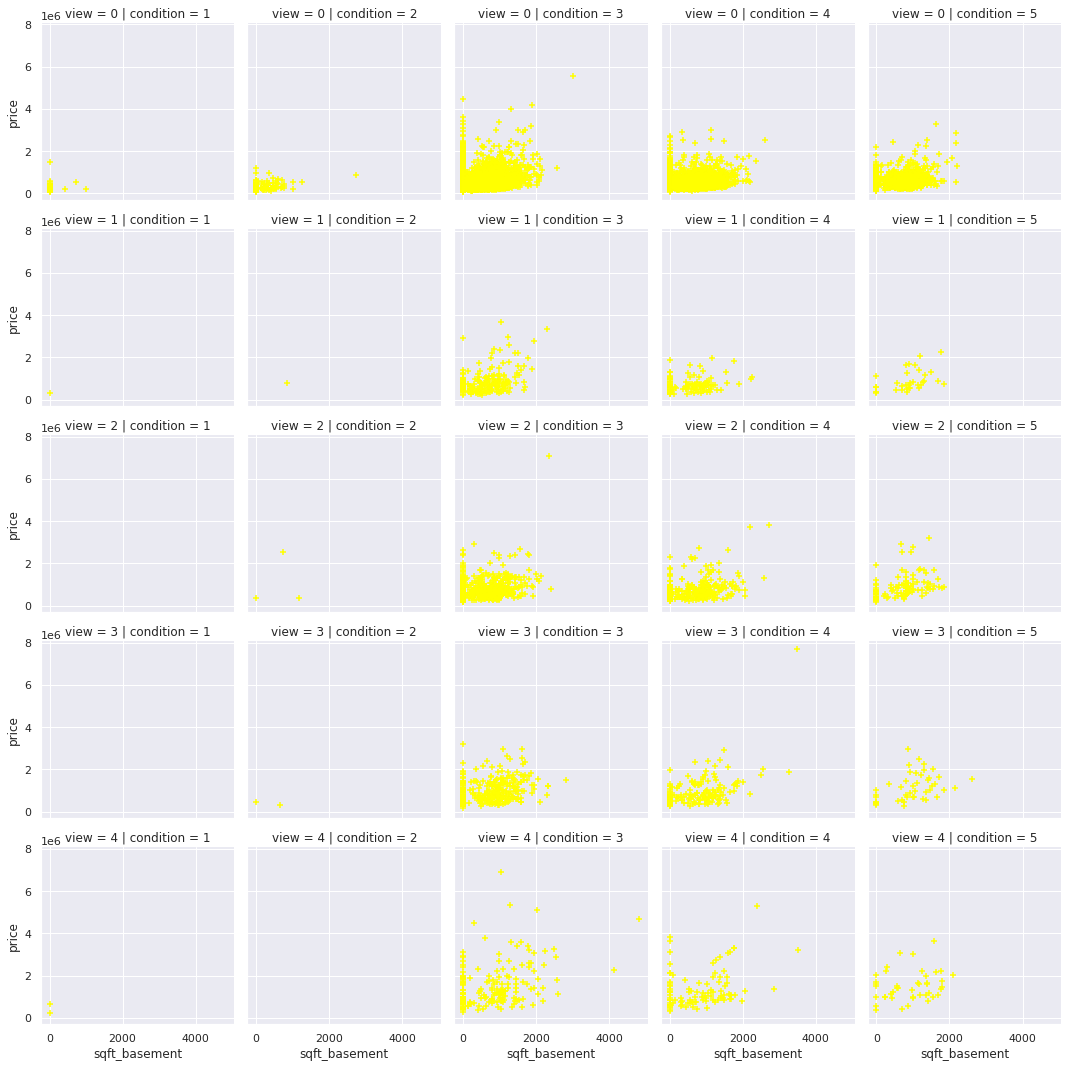

In [18]:
fig7=plt.figure()
sns.set(rc={'figure.figsize':(20,30)})
f7=df[["price", "sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "sqft_living15", "sqft_lot15", "condition", "view"]]

grid4=sns.FacetGrid(f7, row="view", col="condition")
grid4.map(plt.scatter, "sqft_basement", "price", marker="+", color="yellow")

In [19]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


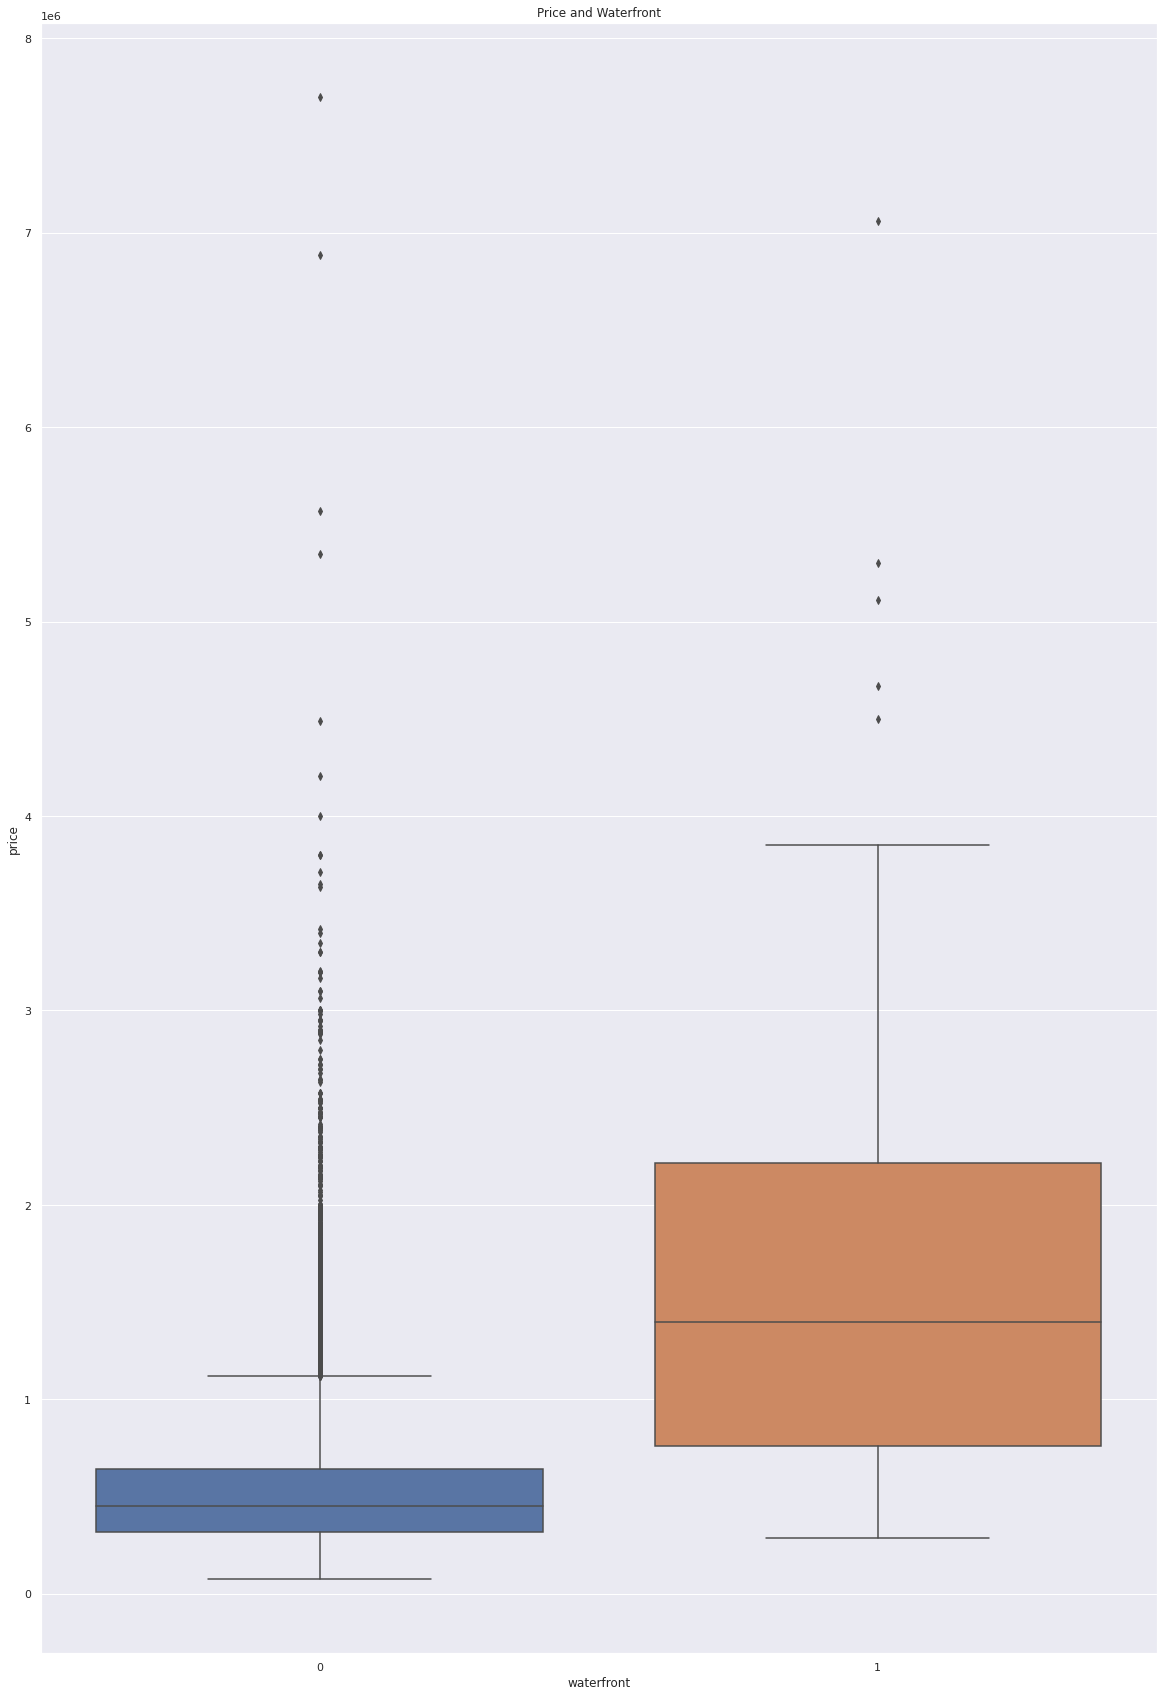

In [20]:
fig8=plt.figure()
plt.title("Price and Waterfront")
sns.set(rc={'figure.figsize':(10,10)})
sns.boxplot(x="waterfront", y="price", data=df)

Text(0.5, 1.0, 'count and year built')

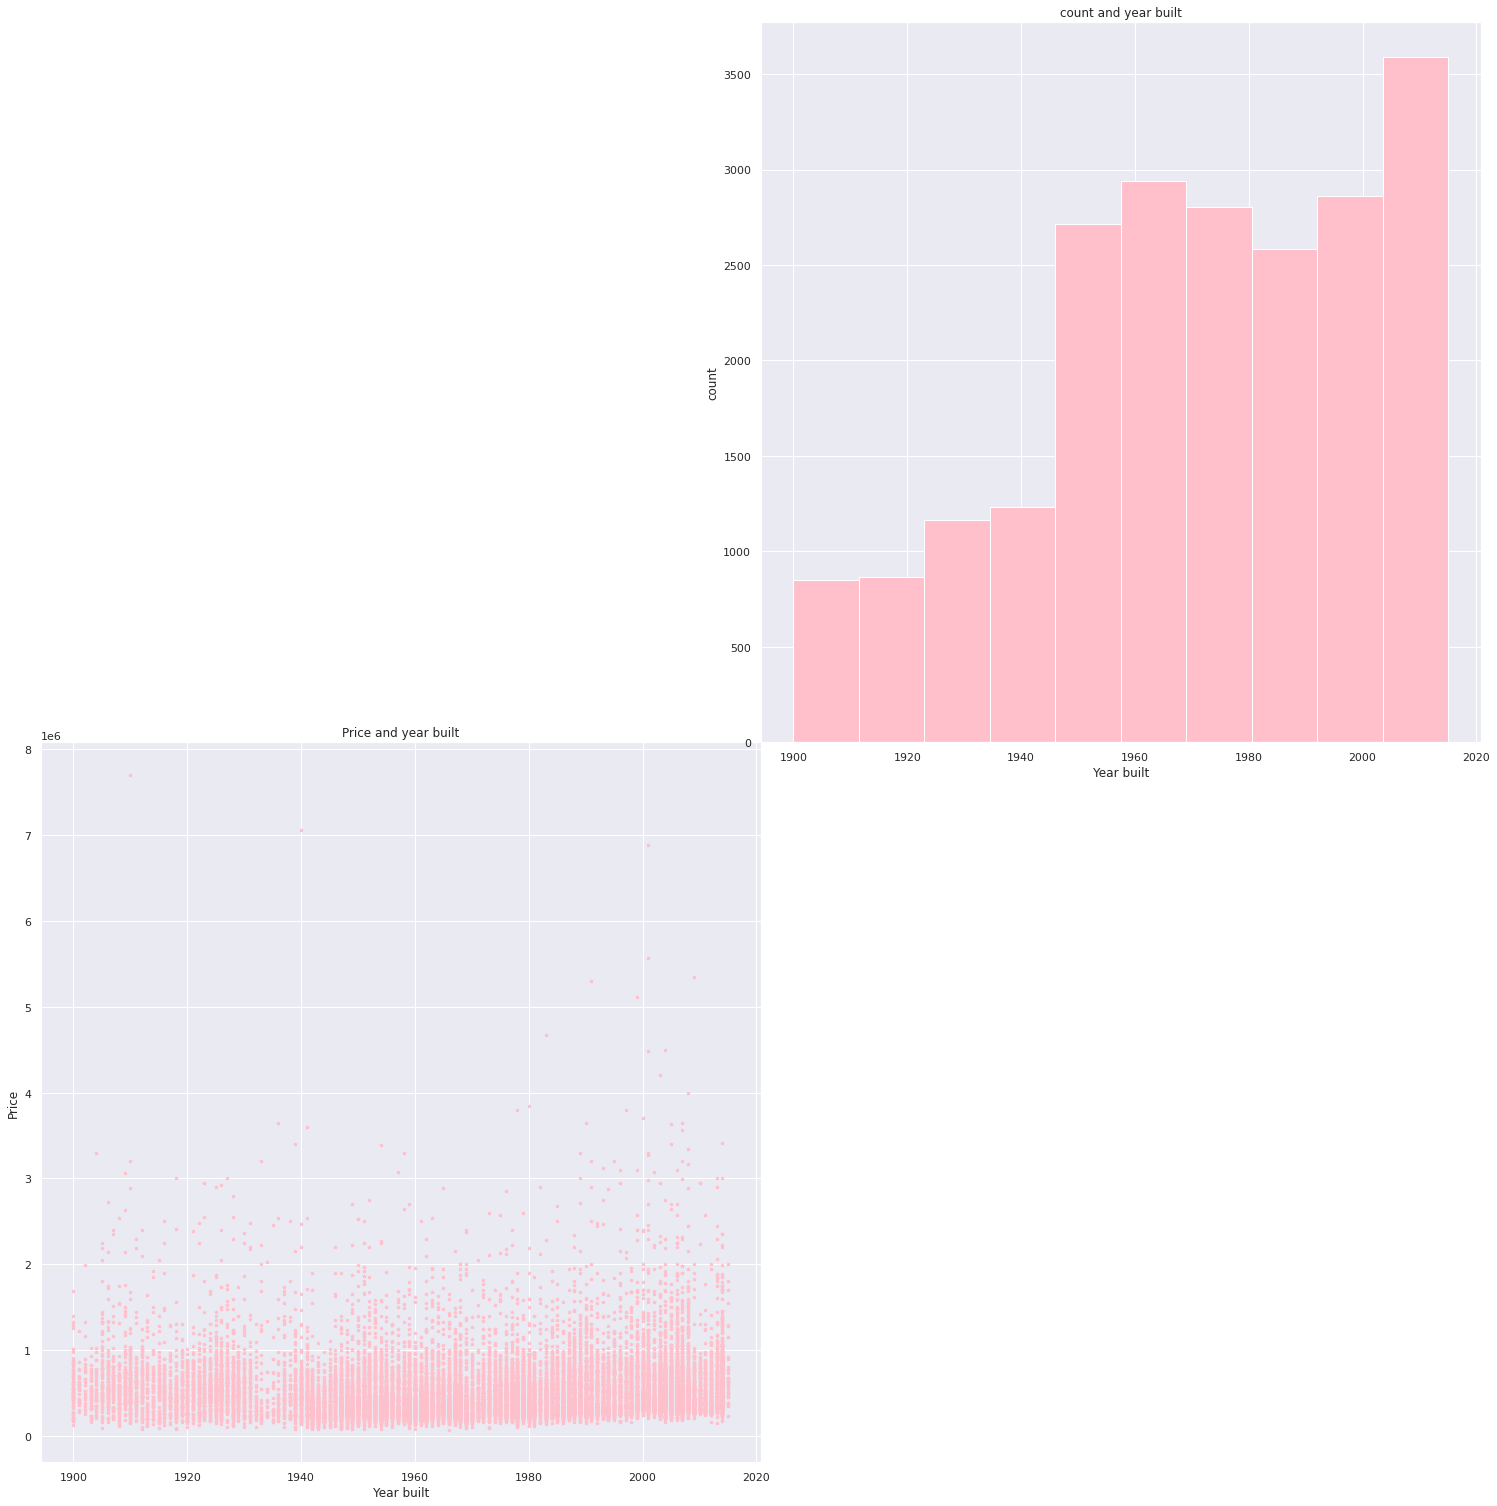

In [21]:
fig9=plt.figure()
ax9=fig9.add_axes([0,0,1,1])
ax9_2=fig9.add_axes([1,1,1,1])
ax9.set_xlabel("Year built")
ax9.set_ylabel("Price")
ax9_2.set_xlabel("Year built")
ax9_2.set_ylabel("count")
ax9.scatter(df["yr_built"], df["price"], s=10, marker="*", color="pink")
ax9_2.hist(df["yr_built"], color="pink")
ax9.set_title("Price and year built")
ax9_2.set_title("count and year built")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Price and grade')

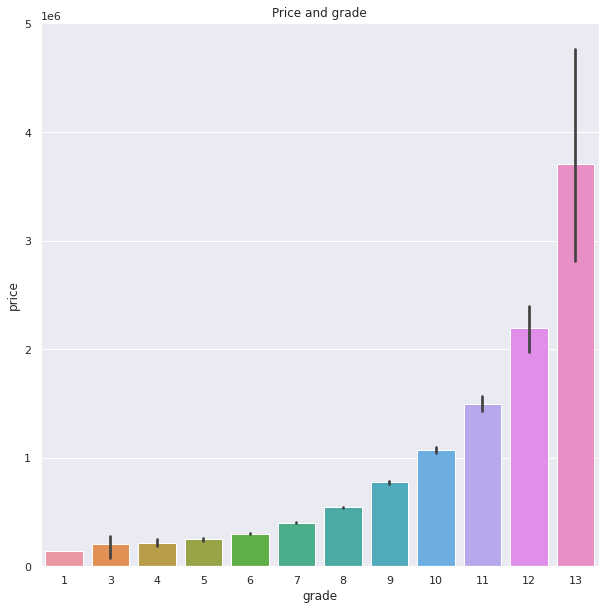

In [22]:
fig10=plt.figure()
sns.barplot(df["grade"], df["price"])
plt.title("Price and grade")

Text(0.5, 1.0, 'Price and floors')

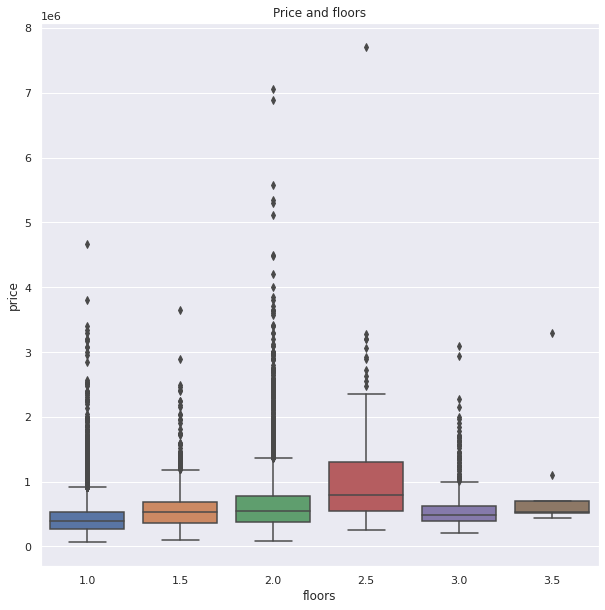

In [23]:
fig11=plt.figure()
sns.boxplot(x=df["floors"], y=df["price"])
plt.title("Price and floors")

# Features selection



Choosing features is based in the data viz bekow.
We'll choose highly correlated inputs with the output.
These features are: bedrooms, bathrooms, sqft_living15, sqft_above, waterfront, grade and floors.

# Machine Learning

In [46]:
#*****************Splitting data******************

x=df.loc[:,["bedrooms","bathrooms","sqft_living15","sqft_above", "waterfront", "grade", "floors"]].values   #choosing the inputs
y=df.loc[:, ["price"]].values                                                                   #choosing the output

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40)   #splitting dataset into training part and testing part

In [48]:
#***********Linear regression******************
model1=LinearRegression()

In [49]:
model1.fit(x_train[:, [2]], y_train)         #fitting the sqft_living input to our model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The datapath rcparam was deprecated in Matplotlib 3.2.1 and will be removed two minor releases later.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]


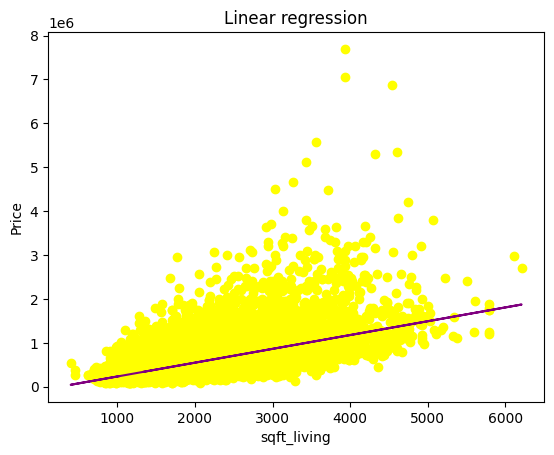

In [50]:
fig12=plt.figure()
sns.set(rc={'figure.figsize':(20,10)})
mpl.rcParams.update(dict(mpl.rcParamsDefault))
plt.scatter(x[:,[2]],y, color="yellow")
plt.title("Linear regression")
plt.xlabel("sqft_living")
plt.ylabel("Price")
plt.plot(x[:, [2]], model1.predict(x[:, [2]]), color="purple")

In [51]:
predicted=model1.predict(x_test[:, [2]])

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", r2_score(y_test,predicted))

MSE 80933367515.28436
R squared 0.356637721256978


In [52]:
#****************Multi-linear regression**********************

model2=LinearRegression()

In [53]:
model2.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
predicted2=model2.predict(x_test)

print("MSE of model2", mean_squared_error(y_test,predicted2))
print("R squared of model2", r2_score(y_test,predicted2), end='\n\n')

if r2_score(y_test,predicted2) > r2_score(y_test,predicted):
  print("model 2 is more acuurate")    #the second model has a higher score
else:
  print("model 1 is more accurate")    #the first model has a higher score



MSE of model2 58902736914.95426
R squared of model2 0.5317654484270776

model 2 is more acuurate


In [55]:
#*********Polynomial regression**************

model3=LinearRegression()
poly=PolynomialFeatures(degree=3)

In [57]:
x_train_fit = poly.fit_transform(x_train)
model3.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted3 = model3.predict(x_test_)

print("MSE of model3", mean_squared_error(y_test,predicted3))
print("R squared of model3 ",r2_score(y_test,predicted3))

if r2_score(y_test,predicted3) > r2_score(y_test,predicted2):
  print("model 3 is more accurate than model 2")
else:
  print("model 2 is more accurate than model 3")

MSE of model3 47575460147.00536
R squared of model3  0.6218091821442522
model 3 is more accurate than model 2
